In [1]:
import requests
import time
from datetime import datetime,timedelta
import pandas as pd
from pandasql import sqldf
import  matplotlib.pyplot as plt
import json

In [2]:
pysql = lambda q : sqldf(q,globals())


In [3]:
# auth = Auth('prepareforairbnb@163.com','ppnn13%leetcode')


In [4]:
cookies='__cfduid=d4a84072b0fd06851ded774c1c925c66b1578385941; csrftoken=bYKw8PDpn3aMfst3z9GPiBXrmg1UrXUyTHN18YyefyDl8EPdFU3qz6cI3lKIj4IS; _ga=GA1.2.447319520.1578385944; _gid=GA1.2.417061552.1578385944; c_a_u="cHJlcGFyZWZvcmFpcmJuYg==:1ip3mE:1CkdEbbTV0PNxa3yZ3BB0qM1pJU"; LEETCODE_SESSION=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJfYXV0aF91c2VyX2lkIjoiMTc1ODU0NyIsIl9hdXRoX3VzZXJfYmFja2VuZCI6ImFsbGF1dGguYWNjb3VudC5hdXRoX2JhY2tlbmRzLkF1dGhlbnRpY2F0aW9uQmFja2VuZCIsIl9hdXRoX3VzZXJfaGFzaCI6Ijk0YjdlZGUwNDlhN2ExZjE1ODZlNDJkOWQ1NjgzYjk0ZDViODMxYWQiLCJpZCI6MTc1ODU0NywiZW1haWwiOiJwcmVwYXJlZm9yYWlyYm5iQDE2My5jb20iLCJ1c2VybmFtZSI6InByZXBhcmVmb3JhaXJibmIiLCJ1c2VyX3NsdWciOiJwcmVwYXJlZm9yYWlyYm5iIiwiYXZhdGFyIjoiaHR0cHM6Ly9hc3NldHMubGVldGNvZGUuY29tL3VzZXJzL3ByZXBhcmVmb3JhaXJibmIvYXZhdGFyXzE1NzQ3NTc4NjAucG5nIiwidGltZXN0YW1wIjoiMjAyMC0wMS0wNyAxNDoxOToxNy44NjI1NzkrMDA6MDAiLCJJUCI6IjEwNi4zNy4xODcuMTMzIiwiSURFTlRJVFkiOiI3ODhlNTVmM2E0NWQyZTI2NWYxZjdjODFkYTE1YzkzMSIsIl9zZXNzaW9uX2V4cGlyeSI6MTIwOTYwMH0._5XQ7uuRWEiUVUlidyGJsSuObz4CrS5UyU_pjs63C9g; __atuvc=1%7C2; _gat=1'
headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Encoding': 'gzip, deflate',
    'Accept-Language': 'en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7,zh-TW;q=0.6',
    'Host': 'leetcode.com',
    'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Mobile Safari/537.36',
    'Referer': 'https://leetcode.com/accounts/login/',
    'Cookie':cookies
}
url = 'https://leetcode.com/api/submissions/?offset={}&limit=20'


In [5]:
cookies2 = '__asc=299bce4516f75a0124a6e31c382; __auc=299bce4516f75a0124a6e31c382; Hm_lvt_fa218a3ff7179639febdb15e372f411c=1578226423; gr_user_id=d58dd89c-b8d4-473f-a10d-64f677b1f799; a2873925c34ecbd2_gr_session_id=799fa5a9-ea3d-44f4-b367-70863fe78e01; _ga=GA1.2.1409587679.1578226423; _gid=GA1.2.1532947133.1578226423; grwng_uid=77c905df-5522-4b0e-ae7f-e6e646c8e5d3; a2873925c34ecbd2_gr_session_id_799fa5a9-ea3d-44f4-b367-70863fe78e01=true; csrftoken=SxaOBoyIH5mpfcpnQAqNkaoroREIYaX5vUP1KdWubrtHja9f4T0FlVGAVnL8Wexq; LEETCODE_SESSION=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJfYXV0aF91c2VyX2lkIjoiMTA1MjUzOCIsIl9hdXRoX3VzZXJfYmFja2VuZCI6ImFsbGF1dGguYWNjb3VudC5hdXRoX2JhY2tlbmRzLkF1dGhlbnRpY2F0aW9uQmFja2VuZCIsIl9hdXRoX3VzZXJfaGFzaCI6ImY1NWI3ZWU2OWZlNjZmMDY1YTU3N2YwZTQxYzE0ZDA2ZjA4ZTFmMTEiLCJpZCI6MTA1MjUzOCwiZW1haWwiOiJ0aW55bWluZHlAaG90bWFpbC5jb20iLCJ1c2VybmFtZSI6InliaW5ndW8iLCJ1c2VyX3NsdWciOiJ5YmluZ3VvIiwiYXZhdGFyIjoiaHR0cHM6Ly9hc3NldHMubGVldGNvZGUtY24uY29tL2FsaXl1bi1sYy11cGxvYWQvZGVmYXVsdF9hdmF0YXIucG5nIiwicGhvbmVfdmVyaWZpZWQiOmZhbHNlLCJ0aW1lc3RhbXAiOiIyMDIwLTAxLTA1IDEyOjEzOjU0LjY0MDkzNyswMDowMCIsIlJFTU9URV9BRERSIjoiMTcyLjIxLjcuMjQ3IiwiSURFTlRJVFkiOiI1NGNlODljYTcyMzc0ODdmMGI4YzM1ODZkMmJmNzdkZSIsIl9zZXNzaW9uX2V4cGlyeSI6MTIwOTYwMH0._v8pcLA7mwbcqz_L_g2YHzyS095LqnY9Bhv6QuLHgNs; Hm_lpvt_fa218a3ff7179639febdb15e372f411c=1578226435; a2873925c34ecbd2_gr_last_sent_sid_with_cs1=799fa5a9-ea3d-44f4-b367-70863fe78e01; a2873925c34ecbd2_gr_last_sent_cs1=ybinguo; a2873925c34ecbd2_gr_cs1=ybinguo'
headers2 = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Encoding': 'gzip, deflate',
    'Accept-Language': 'en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7,zh-TW;q=0.6',
    'Host': 'leetcode-cn.com',
    'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Mobile Safari/537.36',
    'Referer': 'https://leetcode-cn.com/accounts/login/',
    'Cookie':cookies2
}
url2 = 'https://leetcode-cn.com/api/submissions/?offset={}&limit=20'

In [6]:
def getPages(url,headers):
    items = []
    page = 0
    while True:
        r = requests.get(url.format(page),headers=headers)
        print(url.format(page),r.status_code)
        if r.status_code != 200:
            time.sleep(5)
            continue
        js = json.loads(r.text)
        items.extend(js['submissions_dump'])
        page = page +20
        if not js['has_next']:
            break
        time.sleep(1)
    return items

In [7]:
items = getPages(url,headers)

https://leetcode.com/api/submissions/?offset=0&limit=20 200
https://leetcode.com/api/submissions/?offset=20&limit=20 200
https://leetcode.com/api/submissions/?offset=40&limit=20 200
https://leetcode.com/api/submissions/?offset=60&limit=20 200
https://leetcode.com/api/submissions/?offset=80&limit=20 200
https://leetcode.com/api/submissions/?offset=100&limit=20 200
https://leetcode.com/api/submissions/?offset=120&limit=20 200
https://leetcode.com/api/submissions/?offset=140&limit=20 200
https://leetcode.com/api/submissions/?offset=160&limit=20 200
https://leetcode.com/api/submissions/?offset=180&limit=20 200
https://leetcode.com/api/submissions/?offset=200&limit=20 200
https://leetcode.com/api/submissions/?offset=220&limit=20 200
https://leetcode.com/api/submissions/?offset=240&limit=20 200
https://leetcode.com/api/submissions/?offset=260&limit=20 200
https://leetcode.com/api/submissions/?offset=280&limit=20 200
https://leetcode.com/api/submissions/?offset=300&limit=20 200
https://leetco

In [8]:
with open('submissions.txt','w') as fout:
    fout.write(json.dumps(items))

/home/mi/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


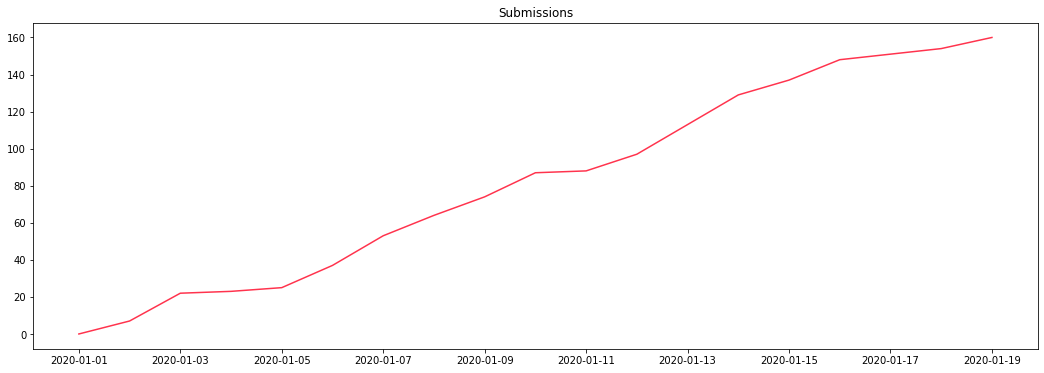

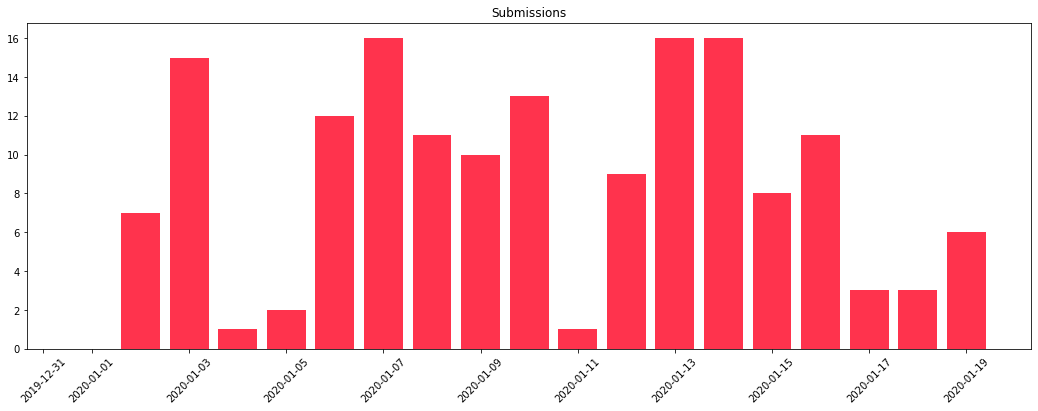

In [9]:
# def plotItems(items):
dt = pd.DataFrame(items)
# dt = dt2.head(100
dt = dt.loc[dt['status_display'] == 'Accepted',]
# print(dt.head(2))

dt['date'] = dt['timestamp'].apply(lambda x : datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
min_date = datetime.utcfromtimestamp(dt['timestamp'].min())
max_date = datetime.utcfromtimestamp(dt['timestamp'].max())+timedelta(days=1)
times = []
while min_date <= max_date:
    times.append(min_date.strftime('%Y-%m-%d'))
    min_date = min_date + timedelta(days=1)
dtime = pd.DataFrame({'date':times})
# print(dtime.head(2))
#     dtime.head(2)
dt.drop_duplicates('title',inplace=True)
#     pysql1 = lambda q : sqldf(q,locals())
# pysql('select * from dt limit 1')
dt1 = pysql('''select A.date as date,nums from 
            dtime as A left join
            (select date,count(*) as nums from dt group by date order by date asc) AS B
            on A.date = B.date
            ''')

dt1.fillna(0,inplace=True)
dt1['label'] = dt1['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
dt1 = dt1.loc[dt1.label >= datetime.strptime('2020-01-01','%Y-%m-%d'),]
plt.figure(figsize=(18, 6))
dt1.nums.cumsum()
plt.locator_params(nbins=10)
plt.plot(dt1.label,dt1.nums.cumsum(),color=(1.0,0.2,0.3),label='_nolegend_')
plt.title('Submissions')
plt.show()
plt.figure(figsize=(18, 6))
# plt.locator_params(nbins=10)
plt.bar(dt1.label,dt1.nums,color=(1.0,0.2,0.3))
plt.xticks(rotation=45)
plt.title('Submissions')
plt.show()


In [10]:
dt1

,date,nums,label
306,2020-01-01,0.0,2020-01-01
307,2020-01-02,7.0,2020-01-02
308,2020-01-03,15.0,2020-01-03
309,2020-01-04,1.0,2020-01-04
310,2020-01-05,2.0,2020-01-05
311,2020-01-06,12.0,2020-01-06
312,2020-01-07,16.0,2020-01-07
313,2020-01-08,11.0,2020-01-08
314,2020-01-09,10.0,2020-01-09
315,2020-01-10,13.0,2020-01-10


In [11]:
dt1.nums.sum()

160.0